# ML HW1 | Supervised Learning | KNN
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Note: I partially took this course in Fall of 2020 and dropped the course. Some content may trigget plagiarism tests.

## Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

## Set directory

In [30]:
directory = "/Users/mikepecorino/Documents/machine_learning/HW1/"

## Load inputs

In [31]:
data_all = pd.read_csv(directory + "sensor_all.csv")

## Define features and response variable

### Features list

In [32]:
features = data_all.columns[data_all.columns.isin(["subject", "activity_raw", "activity", "tag", "fold", "response_prop"]) == False]


### Features data

In [33]:
data_all_features = data_all[features]
train_features = data_all[features][data_all["tag"] == "train"]
valid_features = data_all[features][data_all["tag"] == "valid"]
test_features = data_all[features][data_all["tag"] == "test"]

### Response variable

In [34]:
response = "activity"

### Response data

In [35]:
data_all_response = data_all[response]
train_response = data_all[response][data_all["tag"] == "train"]
valid_response = data_all[response][data_all["tag"] == "valid"]
test_response = data_all[response][data_all["tag"] == "test"]

## KNN

### Normalize

In [36]:
train_features_normalized = normalize(train_features)
valid_features_normalized = normalize(valid_features)

### Grid search

In [37]:
data_cv = data_all[data_all["tag"].isin(["train", "valid"])]
folds = set(data_cv["fold"])
folds

{1, 2, 3, 4, 5}

In [38]:
#Initialize an empty data frame for recording results
knn_results = pd.DataFrame(columns = ["iter_counter",
                                      "fold",
                                      "n_neighbors",
                                      "weights",
                                      "p",
                                      "in_fold_accuracy",
                                      "out_fold_accuracy"])

#Set the hyperparameter space
n_neighbors = [1, 5, 10, 15, 20, 25, 30]

#Start an iteration counter
iter_counter = 0

#For each n_neighbors and fold...
#(keeping weights and minkowski parameter fixed)
for n_neighbor in n_neighbors:
    for weights in ["distance"]:
        for p in [2]:
            for fold in folds:
            
                #Debugging
                #n_neighbors = 1
                #weights = "distance"
                #p = 2
                #fold = 1
        
                #Increment the counter
                iter_counter = iter_counter + 1
    
                #Output message
                print("Iter:", iter_counter,
                      "| fold:", fold,
                      "| n_neighbor:", n_neighbor,
                      "| weights:", weights,
                      "| minkowski parameter:", p)
            
                #Train on 4 out of 5 folds
                train_fold_features = data_cv[data_cv["fold"] != fold][features]
                train_fold_features = normalize(train_fold_features)
                train_fold_response = data_cv[data_cv["fold"] != fold][response]

                #Test on the current fold
                test_fold_features = data_cv[data_cv["fold"] == fold][features]
                test_fold_features = normalize(test_fold_features)
                test_fold_response = data_cv[data_cv["fold"] == fold][response]
                
                #Get the model object
                knn_model = KNeighborsClassifier(n_neighbors = n_neighbor,
                                                         weights = weights,
                                                         algorithm = "auto",
                                                         leaf_size = 1,
                                                         p = p,
                                                         metric = "minkowski",
                                                         metric_params = None,
                                                         n_jobs = 3
                                                        )

                #Fit the model
                knn_model.fit(train_fold_features, train_fold_response) 

                #Evaluate the model
                #In fold
                in_fold_accuracy = knn_model.score(train_fold_features, train_fold_response)
                #Out of fold
                out_fold_accuracy = knn_model.score(test_fold_features, test_fold_response)

                #Add to results list
                knn_results = knn_results.append({"iter_counter": iter_counter,
                                                  "fold": fold,
                                                  "n_neighbors": n_neighbor,
                                                  "weights": weights,
                                                  "p": p,
                                                  "in_fold_accuracy": in_fold_accuracy,
                                                  "out_fold_accuracy": out_fold_accuracy},
                                                ignore_index = True)
                print(knn_results, "\n")

Iter: 1 | fold: 1 | n_neighbor: 1 | weights: distance | minkowski parameter: 2
  iter_counter fold n_neighbors   weights  p  in_fold_accuracy  \
0            1    1           1  distance  2               1.0   

   out_fold_accuracy  
0           0.969758   

Iter: 2 | fold: 2 | n_neighbor: 1 | weights: distance | minkowski parameter: 2
  iter_counter fold n_neighbors   weights  p  in_fold_accuracy  \
0            1    1           1  distance  2               1.0   
1            2    2           1  distance  2               1.0   

   out_fold_accuracy  
0           0.969758  
1           0.965092   

Iter: 3 | fold: 3 | n_neighbor: 1 | weights: distance | minkowski parameter: 2
  iter_counter fold n_neighbors   weights  p  in_fold_accuracy  \
0            1    1           1  distance  2               1.0   
1            2    2           1  distance  2               1.0   
2            3    3           1  distance  2               1.0   

   out_fold_accuracy  
0           0.969758  
1

   iter_counter fold n_neighbors   weights  p  in_fold_accuracy  \
0             1    1           1  distance  2               1.0   
1             2    2           1  distance  2               1.0   
2             3    3           1  distance  2               1.0   
3             4    4           1  distance  2               1.0   
4             5    5           1  distance  2               1.0   
5             6    1           5  distance  2               1.0   
6             7    2           5  distance  2               1.0   
7             8    3           5  distance  2               1.0   
8             9    4           5  distance  2               1.0   
9            10    5           5  distance  2               1.0   
10           11    1          10  distance  2               1.0   
11           12    2          10  distance  2               1.0   
12           13    3          10  distance  2               1.0   

    out_fold_accuracy  
0            0.969758  
1            

   iter_counter fold n_neighbors   weights  p  in_fold_accuracy  \
0             1    1           1  distance  2               1.0   
1             2    2           1  distance  2               1.0   
2             3    3           1  distance  2               1.0   
3             4    4           1  distance  2               1.0   
4             5    5           1  distance  2               1.0   
5             6    1           5  distance  2               1.0   
6             7    2           5  distance  2               1.0   
7             8    3           5  distance  2               1.0   
8             9    4           5  distance  2               1.0   
9            10    5           5  distance  2               1.0   
10           11    1          10  distance  2               1.0   
11           12    2          10  distance  2               1.0   
12           13    3          10  distance  2               1.0   
13           14    4          10  distance  2               1.

   iter_counter fold n_neighbors   weights  p  in_fold_accuracy  \
0             1    1           1  distance  2               1.0   
1             2    2           1  distance  2               1.0   
2             3    3           1  distance  2               1.0   
3             4    4           1  distance  2               1.0   
4             5    5           1  distance  2               1.0   
5             6    1           5  distance  2               1.0   
6             7    2           5  distance  2               1.0   
7             8    3           5  distance  2               1.0   
8             9    4           5  distance  2               1.0   
9            10    5           5  distance  2               1.0   
10           11    1          10  distance  2               1.0   
11           12    2          10  distance  2               1.0   
12           13    3          10  distance  2               1.0   
13           14    4          10  distance  2               1.

   iter_counter fold n_neighbors   weights  p  in_fold_accuracy  \
0             1    1           1  distance  2               1.0   
1             2    2           1  distance  2               1.0   
2             3    3           1  distance  2               1.0   
3             4    4           1  distance  2               1.0   
4             5    5           1  distance  2               1.0   
5             6    1           5  distance  2               1.0   
6             7    2           5  distance  2               1.0   
7             8    3           5  distance  2               1.0   
8             9    4           5  distance  2               1.0   
9            10    5           5  distance  2               1.0   
10           11    1          10  distance  2               1.0   
11           12    2          10  distance  2               1.0   
12           13    3          10  distance  2               1.0   
13           14    4          10  distance  2               1.

   iter_counter fold n_neighbors   weights  p  in_fold_accuracy  \
0             1    1           1  distance  2               1.0   
1             2    2           1  distance  2               1.0   
2             3    3           1  distance  2               1.0   
3             4    4           1  distance  2               1.0   
4             5    5           1  distance  2               1.0   
5             6    1           5  distance  2               1.0   
6             7    2           5  distance  2               1.0   
7             8    3           5  distance  2               1.0   
8             9    4           5  distance  2               1.0   
9            10    5           5  distance  2               1.0   
10           11    1          10  distance  2               1.0   
11           12    2          10  distance  2               1.0   
12           13    3          10  distance  2               1.0   
13           14    4          10  distance  2               1.

   iter_counter fold n_neighbors   weights  p  in_fold_accuracy  \
0             1    1           1  distance  2               1.0   
1             2    2           1  distance  2               1.0   
2             3    3           1  distance  2               1.0   
3             4    4           1  distance  2               1.0   
4             5    5           1  distance  2               1.0   
5             6    1           5  distance  2               1.0   
6             7    2           5  distance  2               1.0   
7             8    3           5  distance  2               1.0   
8             9    4           5  distance  2               1.0   
9            10    5           5  distance  2               1.0   
10           11    1          10  distance  2               1.0   
11           12    2          10  distance  2               1.0   
12           13    3          10  distance  2               1.0   
13           14    4          10  distance  2               1.

### Output

In [39]:
knn_results = knn_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
knn_results.to_csv(directory + "sensor_knn_grid_search.csv", index = False)
knn_results

,iter_counter,fold,n_neighbors,weights,p,in_fold_accuracy,out_fold_accuracy
4,5,5,1,distance,2,1.0,0.979452
14,15,5,10,distance,2,1.0,0.971918
0,1,1,1,distance,2,1.0,0.969758
9,10,5,5,distance,2,1.0,0.967123
5,6,1,5,distance,2,1.0,0.967070
1,2,2,1,distance,2,1.0,0.965092
10,11,1,10,distance,2,1.0,0.964382
3,4,4,1,distance,2,1.0,0.964286
6,7,2,5,distance,2,1.0,0.963039
19,20,5,15,distance,2,1.0,0.963014


### Get mean accuracy across the folds

In [40]:
knn_results = pd.read_csv(directory + "sensor_knn_grid_search.csv")
knn_results

,iter_counter,fold,n_neighbors,weights,p,in_fold_accuracy,out_fold_accuracy
0,5,5,1,distance,2,1.0,0.979452
1,15,5,10,distance,2,1.0,0.971918
2,1,1,1,distance,2,1.0,0.969758
3,10,5,5,distance,2,1.0,0.967123
4,6,1,5,distance,2,1.0,0.967070
5,2,2,1,distance,2,1.0,0.965092
6,11,1,10,distance,2,1.0,0.964382
7,4,4,1,distance,2,1.0,0.964286
8,7,2,5,distance,2,1.0,0.963039
9,20,5,15,distance,2,1.0,0.963014


In [41]:
in_fold_cv_summary = knn_results.groupby(["n_neighbors", "weights", "p"])["in_fold_accuracy"].agg(["mean"]).sort_values(by = ["mean"], ascending = False)
out_fold_cv_summary = knn_results.groupby(["n_neighbors", "weights", "p"])["out_fold_accuracy"].agg(["mean"]).sort_values(by = ["mean"], ascending = False)

print(out_fold_cv_summary)

                            mean
n_neighbors weights  p          
1           distance 2  0.968320
5           distance 2  0.963407
10          distance 2  0.963015
15          distance 2  0.957701
20          distance 2  0.956876
25          distance 2  0.949824
30          distance 2  0.948576


### Get the optimal hyperparameters

In [42]:
optimal_results = out_fold_cv_summary.index[np.argmax(out_fold_cv_summary["mean"])]
n_neighbors_opt = optimal_results[0]
weights_opt = optimal_results[1]
p_opt = optimal_results[2]

### Train a final model with the optimal hyperparameters

In [43]:
knn_model = KNeighborsClassifier(n_neighbors = n_neighbors_opt,
                                 weights = weights_opt,
                                 algorithm = "auto",
                                 leaf_size = 1,
                                 p = p_opt,
                                 metric = "minkowski",
                                 metric_params = None,
                                 n_jobs = 3)

knn_model.fit(normalize(train_features), train_response) 

print("KNN accuracy on training data: ",
      knn_model.score(normalize(train_features), train_response))
print("KNN accuracy on validation data: ",
      knn_model.score(normalize(valid_features), valid_response))
print("KNN accuracy on test data: ",
      knn_model.score(normalize(test_features), test_response))

KNN accuracy on training data:  1.0
KNN accuracy on validation data:  0.9682539682539683
KNN accuracy on test data:  0.8669833729216152


### Learning curve

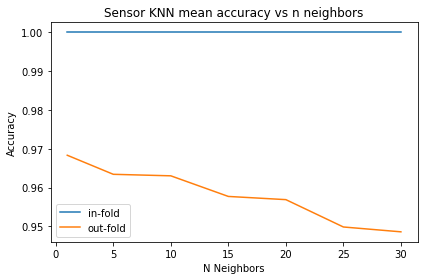

In [51]:
in_fold_neighbor_summary = knn_results.groupby(['n_neighbors'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['n_neighbors'], ascending = True)
out_fold_neighbor_summary = knn_results.groupby(['n_neighbors'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['n_neighbors'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("N Neighbors")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor KNN mean accuracy vs n neighbors")
ax.plot(n_neighbors,
        in_fold_neighbor_summary['mean'],
        label = "in-fold")
ax.plot(n_neighbors,
        out_fold_neighbor_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

## Training size

### Normalize

In [46]:
data_all_features_normalized = normalize(data_all_features)

In [47]:
knn_train_sizes = []
knn_train_size_train_scores = []
knn_train_size_test_scores = []
knn_train_size_train_time = []
knn_train_size_score_time = []

iter_counter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(data_all_features_normalized,
                                                                            data_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter_counter = iter_counter + 1
    print("iter:", iter_counter,
          " | train size:", train_size)
    knn_train_size = KNeighborsClassifier(n_neighbors = n_neighbors_opt,
                                          weights = weights_opt,
                                          algorithm = 'auto',
                                          leaf_size = 1,
                                          p = p_opt,
                                          metric = 'minkowski',
                                          metric_params = None,
                                          n_jobs = 3)
    
    start = time.time()
    knn_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    knn_train_size_train_time.append(end - start)

    knn_train_sizes.append(knn_train_size)
    
    start = time.time()
    knn_train_size_train_scores.append(knn_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    knn_train_size_score_time.append(end - start)

    knn_train_size_test_scores.append(knn_train_size.score(test_features_train_size, test_response_train_size))

iter: 1  | train size: 0.05
iter: 2  | train size: 0.1
iter: 3  | train size: 0.15
iter: 4  | train size: 0.2
iter: 5  | train size: 0.25
iter: 6  | train size: 0.3
iter: 7  | train size: 0.35
iter: 8  | train size: 0.39999999999999997
iter: 9  | train size: 0.44999999999999996
iter: 10  | train size: 0.49999999999999994
iter: 11  | train size: 0.5499999999999999
iter: 12  | train size: 0.6
iter: 13  | train size: 0.65
iter: 14  | train size: 0.7
iter: 15  | train size: 0.75
iter: 16  | train size: 0.7999999999999999
iter: 17  | train size: 0.85
iter: 18  | train size: 0.9
iter: 19  | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

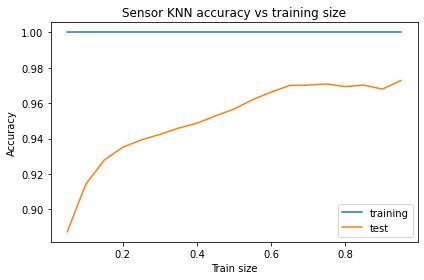

In [48]:
fig, ax = plt.subplots()

ax.set_xlabel("Train size")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor KNN accuracy vs training size")
ax.plot(train_sizes, knn_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, knn_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()

fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

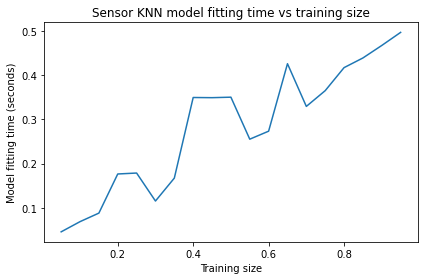

In [49]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("Sensor KNN model fitting time vs training size")
ax.plot(train_sizes, knn_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

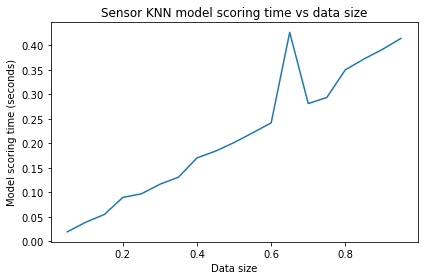

In [50]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("Sensor KNN model scoring time vs data size")
ax.plot(train_sizes, knn_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()